### Importing Modules (p214)

In [1]:
from scipy import optimize
import cvxopt

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sympy
sympy.init_printing()

### Classification of Optimization Problems (P214)

$
•\text{ optimization problem is } \begin{cases}\text{univiariate/one dimensional if } x\in ℝ \text{ is a scalar}\\ \text{multivariate/multidimensional if }x\inℝ^n \text{ is a vector}\end{cases}
$ 

$
• \text{ optimization problem is}\begin{cases}\text{linear optimization problem if the objective function and the constraints are all linear}\\ \text{nonlinear optimization problem if either the objective function or the constraints are nonlinear}\end{cases}
$

$
•\text{ convex function : a function is convex on an interval }[a,b] \\ \Rightarrow \text{ if the values of the function on this interval lie below the line through the endpoints }(a,f(a)) \ and \ (b, f(b))
$

$
•\text{ finding candidates for the optimal value of }f(x)=0 \\
\Rightarrow \text{ equivalent to solving the equation system }\triangledown f(x)=0 \text{  (a.k.a. statinoary point)}\\ \Rightarrow \text{ doesn't necessarily correspond to a minimum e.g. maximum or a saddle point} \\ \Rightarrow \text{ rather, it should be tested for optimality}
$

### Univariate Optimization (p217)

$
•\: golden\: section\: search\: method \text{ (scipy.optimize)}\\ \Rightarrow \text{ is guranteed to converge to an optimal point for functions with a unique minimum on the given interval} \\ \Rightarrow \text{ not so for complicated functions } \\ \Rightarrow \text{ need to select initial interval carefully}
$

$
•\text{ a combination of bisection method and Newton's method} \\ \Rightarrow \text{ widely used with univariate optimization problems (stability + fast convergence} \\ \Rightarrow \text{ scipy.brent}
$

* symbolic approach

In [2]:
r, h = sympy.symbols("r, h")
Area = 2 * sympy.pi * r**2 + 2 * sympy.pi * r * h
Volume = sympy.pi * r**2 * h
h_r = sympy.solve(Volume -1)[0]
Area_r = Area.subs(h_r)
rsol = sympy.solve(Area_r.diff(r))[0]

In [3]:
Area, Volume

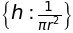

In [4]:
h_r

In [5]:
Area_r

In [6]:
rsol

In [7]:
_.evalf()

In [8]:
Area_r.diff(r, 2).subs(r, rsol)

In [9]:
Area_r.subs(r, rsol)

In [10]:
_.evalf()

* numerical technique - optimize.brent

In [11]:
def f(r):
    return 2* np.pi * r**2 + 2/r

In [12]:
r_min = optimize.brent(f, brack=(0.1, 4))
r_min

In [13]:
f(r_min)

* numerical technique - optimize.minimize_scalar

In [14]:
optimize.minimize_scalar(f, bracket=(0.1, 4))

     fun: 5.535810445932086
    nfev: 19
     nit: 15
 success: True
       x: 0.5419260772557135

### Unconstrained Multivariate Optimization (P221)

$
•\: steepest\: descent\: method : x_{k+1}=x_k-\alpha_k\triangledown f(x_k) \\ \Rightarrow \text{where }\alpha_k\text{ is a free parameter (line search parameter)} \\ \Rightarrow a_k\text{ can be selected by solving }min_{ak}f(x_k-\alpha_k \triangledown f(x_k)) \\ \Rightarrow \text{guarantees convergence to a minimum of the function (slow)}
$

In [15]:
x1, x2 = sympy.symbols("x_1, x_2")
f_sym = (x1-1)**4 + 5 * (x2-1)**2 - 2*x1*x2
fprime_sym = [f_sym.diff(x_) for x_ in (x1, x2)]

In [16]:
f_sym, fprime_sym

In [17]:
# Gradient
sympy.Matrix(fprime_sym)

⎡                  3⎤
⎢-2⋅x₂ + 4⋅(x₁ - 1) ⎥
⎢                   ⎥
⎣-2⋅x₁ + 10⋅x₂ - 10 ⎦

In [18]:
fhess_sym = [[f_sym.diff(x1_, x2_) for x1_ in (x1, x2)] for x2_ in (x1, x2)]

In [19]:
# Hessian
sympy.Matrix(fhess_sym)

⎡           2    ⎤
⎢12⋅(x₁ - 1)   -2⎥
⎢                ⎥
⎣     -2       10⎦

In [20]:
# vectorized functions
f_lmbda = sympy.lambdify((x1, x2), f_sym, 'numpy')
fprime_lmbda = sympy.lambdify((x1, x2), fprime_sym, 'numpy')
fhess_lmbda = sympy.lambdify((x1, x2), fhess_sym, 'numpy')

In [21]:
def func_XY_to_X_Y(f):
    return lambda X: np.array(f(X[0], X[1]))

f = func_XY_to_X_Y(f_lmbda)
fprime = func_XY_to_X_Y(fprime_lmbda)
fhess = func_XY_to_X_Y(fhess_lmbda)

In [22]:
# set starting point to (0, 0)
x_opt = optimize.fmin_ncg(
    f,
    (0, 0),
    fprime=fprime,
    fhess=fhess
)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 17
         Hessian evaluations: 8


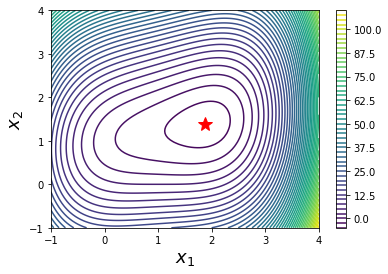

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f_lmbda(X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax);

$
•\text{ numerically estimate the gradient or the Hessian } \\ \Rightarrow \begin{cases}\text{quasi-Newton method : methods that approximate the Hessian}\\\text{Broyden-Fletcher-Goldfarb-Shanno (BFGS) and the conjugate gradient methods : avoid Hessian}\end{cases}
$

In [24]:
optimize.fmin_bfgs(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13


array([1.88292645, 1.37658596])

In [25]:
optimize.fmin_cg(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18


array([1.88292612, 1.37658523])

In [26]:
# number of function evaluations ↑
optimize.fmin_bfgs(f, (0, 0))

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 52
         Gradient evaluations: 13


array([1.88292644, 1.37658595])

$
•\text{ What to do in case of multiple local minima} \\ \Rightarrow \text{ brute force search over a coordinate grid to find a suitable starting point } \\ \Rightarrow \text{ find a global minimum within given coordinate ranges}
$

In [27]:
def f(X):
    x, y = X
    return (4 * np.sin(np.pi * x) + 6 * np.sin(np.pi * y)) + (x - 1)**2 + (y-1)**2

In [28]:
x_start = optimize.brute(
    f,
    (slice(-3, 5, 0.5), slice(-3, 5, 0.5)),
    finish=None
)
x_start

array([1.5, 1.5])

In [29]:
# starting point
f(x_start)

In [30]:
x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 28
         Gradient evaluations: 7


In [31]:
# final minimal point
x_opt

array([1.47586906, 1.48365787])

In [32]:
# minimum value of the objective function
f(x_opt)

In [33]:
def func_X_Y_to_XY(f, X, Y):
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

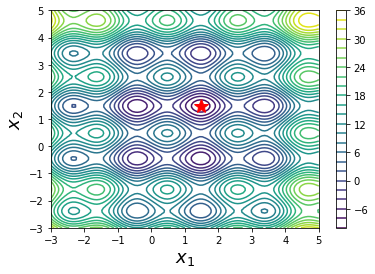

In [34]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-3, 5, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 25)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax);

In [35]:
optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 28
         Gradient evaluations: 7


array([1.47586906, 1.48365787])

In [36]:
# alternative for above is "optimize.minimize"
result = optimize.minimize(f, x_start, method='BFGS')
result.x

array([1.47586906, 1.48365787])

### Nonlinear Least Square Problems (p230)

$
•\text{ least square problem} \\ \Rightarrow \text{optimization problem with the objective function, }g(\beta)\\ \Rightarrow g(\beta) =\sum_{i=0}^{m}r_i(\beta)^2= ||{r(\beta)}||^2 \quad \text{ where }r(\beta) \text{ is a vector with the residuals }r_i(\beta)=y_i - f(x_i,\: \beta)
$

$
• Levenberg-Marquardt\: method \\ \Rightarrow \text{ one example that solves particular optimization problem} \\ \Rightarrow \text{ based on the idea of successive linearizations of the prolbem in each iteration}
$

In [37]:
beta = (0.25, 0.75, 0.5)
xdata = np.linspace(0, 5, 50)

In [38]:
# model function
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

In [39]:
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

In [40]:
# function for the residuals
def g(beta):
    return ydata - f(xdata, *beta)

In [41]:
# define an initial guess for the parameter vector
beta_start = (1, 1, 1)
beta_opt, beta_cov = optimize.leastsq(g, beta_start)

In [42]:
# close to true parameters "beta"
beta_opt

array([0.26329036, 0.75614482, 0.54896375])

In [43]:
beta_cov

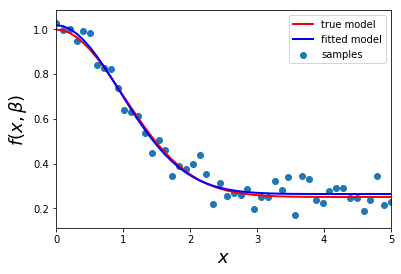

In [44]:
# plot obeservation data and the model function
# for the true and fitted function parameters
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='samples')
ax.plot(xdata, y, 'r', lw=2, label='true model')
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='fitted model')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend();

In [45]:
# eliminates the need to explicitly define the residual
# function for the least square problem
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
beta_opt

array([0.26329036, 0.75614482, 0.54896375])

### Constrained Optimization (p232)

$
e.g. f(x)=(x_i-1)^2-(x_2-1)^2 \begin{cases}2\leq x_i \leq 3\\0 \leq x_2 \leq 2\end{cases}
$

In [46]:
def f(X):
    x, y = X
    return (x-1)**2 + (y-1)**2

In [47]:
x_opt = optimize.minimize(f, [1, 1], method='BFGS').x
x_opt

array([1., 1.])

In [48]:
bnd_x1, bnd_x2 = (2, 3), (0, 2)
x_cons_opt = optimize.minimize(
    f, 
    [1, 1], 
    method='L-BFGS-B', 
    bounds=[bnd_x1, bnd_x2]
).x
x_cons_opt

array([2., 1.])

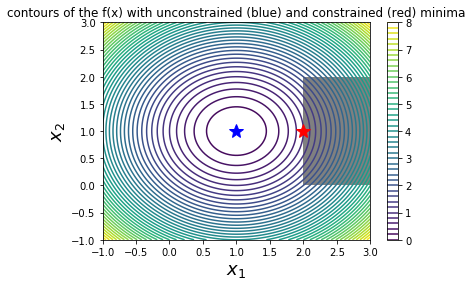

In [49]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]),
                               bnd_x1[1] - bnd_x1[0], bnd_x2[1] -
                               bnd_x2[0], facecolor="grey")
ax.add_patch(bound_rect)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.title("contours of the f(x) with unconstrained (blue) and constrained (red) minima")
plt.colorbar(c, ax=ax);

$
•\text{ Lagrange multipler} \\ \Rightarrow \text{ constrained optimization problem} \to \text{an unconstrained problem with additional variables} \\ \Rightarrow e.g. \\ \quad \quad •\text{ maximize the volume of a rectangle with sides of length } x_1,\: x_2,\: x_3 \\ \quad \quad • \text{subject to the constraint that the total surface area should be } g(x) = 2x_1x_2+2x_0x_2+2x_1x_0-1=0 
$

In [50]:
x = x0, x1, x2, l = sympy.symbols("x_0, x_1, x_2, lambda")
f = x0 * x1 * x2
g = 2 * (x0 * x1 + x1 * x2 + x2 * x0) - 1
L = f+ l * g

In [51]:
grad_L = [sympy.diff(L, x_) for x_ in x]
sols = sympy.solve(grad_L)
sols

In [52]:
g.subs(sols[0])

In [53]:
f.subs(sols[0])

In [54]:
# sequential least square programming "SLSQP"
# handle inequality constraints
# scipy optimization functions solve minimization
# whereas we need maximization
# thus we get negative of the original objective function
def f(X):
    return -X[0] * X[1] * X[2]
def g(X):
    return 2 * (X[0]*X[1] + X[1] * X[2] + X[2] * X[0]) - 1

In [55]:
# define the constraint dictionary for g(x)=0
constraint = dict(type='eq', fun=g)
optimize.minimize(
    f,
    [0.5, 1, 1.5],
    method='SLSQP',
    constraints=[constraint]
)

     fun: -0.06804136862287297
     jac: array([-0.16666925, -0.16666542, -0.16666526])
 message: 'Optimization terminated successfully.'
    nfev: 95
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([0.40824188, 0.40825127, 0.40825165])

In [56]:
# set type='ineq' to solve problmes with inequality constraints
def f(X):
    return (X[0] - 1)**2 + (X[1] - 1)**2
def g(X):
    return X[1] - 1.75 - (X[0] - 0.75)**4
constraints = [dict(type='ineq', fun=g)]
constraints

[{'type': 'ineq', 'fun': <function __main__.g(X)>}]

In [57]:
# solve the optimization problem
x_opt = optimize.minimize(f, (0, 0), method='BFGS').x
x_cons_opt = optimize.minimize(f, (0, 0), method='SLSQP', constraints=constraints).x

In [58]:
x_opt

array([0.99999999, 0.99999999])

In [59]:
x_cons_opt

array([0.96857656, 1.75228252])

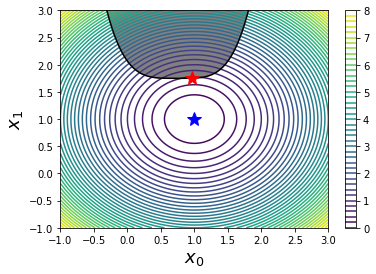

In [60]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_, 1.75 + (x_-0.75)**4, 'k-', markersize=15)
ax.fill_between(x_, 1.75 + (x_-0.75)**4, 3, color='grey')
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
ax.set_ylim(-1, 3)
ax.set_xlabel(r"$x_0$", fontsize=18)
ax.set_ylabel(r"$x_1$", fontsize=18)
plt.colorbar(c, ax=ax);

#### Linear Programming (p238)

$
• \text{ the objective function is linear and all constraints are linear equality or inequality constraints} \\ • \text{ the solution to linear optimization problem must lie on a constraint boundary} \\ \Rightarrow \text{ search the vertices of the intersections of the linear constraint functions} \\ •\text{ written in standard form } min_xc^tx\text{ where } Ax\leq b\: and\: x \geq 0 \\ •\text{ e.g.  } f(x)=-x_0+2x_1-3x_2 \: \text{ subject to }\begin{cases}x_0+x_1 \leq 1\\-x_0+3x_1 \leq 2\\-x_1+x_2 \leq 3\end{cases} \\ \Rightarrow c=(-1,2,-3), \: b=(1, 2, 3)\: and\: A=\begin{pmatrix}1&1&0\\-1&3&0\\0&-1&1\end{pmatrix}
$

In [61]:
c = np.array([-1.0, 2.0, -3.0])
A = np.array([[1.0, 1.0, 0.0],
              [-1.0, 3.0, 0.0],
              [0.0, -1.0, 1.0]])
b = np.array([1.0, 2.0, 3.0])
A_ = cvxopt.matrix(A)
b_ = cvxopt.matrix(b)
c_ = cvxopt.matrix(c)

In [62]:
sol = cvxopt.solvers.lp(c_, A_, b_)

     pcost       dcost       gap    pres   dres   k/t
 0: -1.0000e+01 -1.6000e+01  7e+00  5e-01  8e-01  1e+00
 1: -1.0052e+01 -1.0256e+01  2e-01  2e-02  4e-02  9e-02
 2: -1.0001e+01 -1.0003e+01  2e-03  2e-04  4e-04  1e-03
 3: -1.0000e+01 -1.0000e+01  2e-05  2e-06  4e-06  1e-05
 4: -1.0000e+01 -1.0000e+01  2e-07  2e-08  4e-08  1e-07
Optimal solution found.


In [63]:
sol

{'x': <3x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <3x1 matrix, tc='d'>,
 'z': <3x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 1.5162362097729662e-07,
 'relative gap': 1.516236201730634e-08,
 'primal objective': -10.000000053041422,
 'dual objective': -10.000000259808651,
 'primal infeasibility': 2.004467229216385e-08,
 'dual infeasibility': 3.6596396748175394e-08,
 'primal slack': 7.158147560456611e-09,
 'dual slack': 4.3301441010987715e-08,
 'residual as primal infeasibility certificate': None,
 'residual as dual infeasibility certificate': None,
 'iterations': 4}

In [64]:
x = np.array(sol['x'])
x

array([[0.43162943],
       [0.56837051],
       [3.56837055]])

In [65]:
sol['primal objective']